In [16]:
#Lets load the data

import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("../input/sms-spam-collection/SMSSpamCollection", sep='\t', names=["label", "message"])
print(data.shape)

(5572, 2)


In [18]:
data = data.head(500)

In [19]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ''.join(words)

data['cleaned_message'] = data['message'].apply(preprocess_text)

print(data[['message', 'cleaned_message']].head())

                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  gojurongpointcrazyavailablebugisngreatworldlae...  
1                                 oklarjokingwifuoni  
2  freeentry2wklycompwinfacupfinaltkts21stmay2005...  
3                        udunsayearlyhorucalreadysay  
4               nahdontthinkgoesusflivesaroundthough  


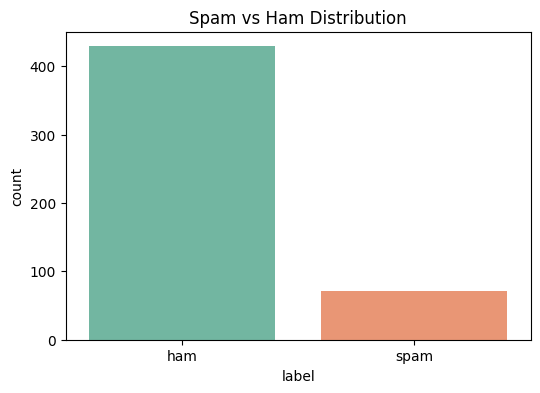

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='label', palette='Set2')
plt.title('Spam vs Ham Distribution')
plt.show()